# POLYNOMIAL MODELS AND VALIDATION

**1)Consider the data set Exam3DataSet provided in the Ninova. The dataset 
includes x (that represent the single feature) and y (that represents the target 
variable) values of 100 different observations. You decided to use a polynomial 
regression model but worry about the choice of the degree of the polynomial.**

**(a) Split your dataset into a test set and train set. (20% test set, 80% training set)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# After import Pandas, csv dataset is read.

df = pd.read_csv('MiniExam3DataSet.csv')
df.head()

,x,y
0,-4.809264,-92.911272
1,-4.722680,-98.506658
2,-3.852326,-63.212666
3,-3.687668,-51.036538
4,-3.602674,-54.784580


In [3]:
X = np.array(df['x'].values.reshape(-1,1)) # Feature of the data
Y = np.array(df['y'].values) # Target variable

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Data is splitted as being 20% test size and 80% training size:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

**(b) Try different degrees of polynomial functions and pick the one that has the 
smallest LOOCV mean squared error, and report LOOCV validation errors of 
each polynomial functions**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [7]:
def pol_reg_model(degree, X_train_v, Y_train_v, X_valid, Y_valid):
    
    # Inputs of the pol_reg_model function are polynomial degree,
    # validation splits from training set of the data as train_v and valid for X and Y.
    # PolynomialFeatures function is added to pol_reg_model function, and input of this function degree of the polynomial
    
    features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Training and validation part of the X are fitted 
    # by using X_train_v and X_valid which came from input of this function
    
    X_train_pol = features.fit_transform(X_train_v)
    X_valid_pol = features.fit_transform(X_valid) 
    
    # LinearRegression model is added to the function, and this model is fitted by using 
    # X_train_pol (transformed training feature matrix based on the polynomial degree)
    # and Y_train_v (actual target values in the training dataset)
    
    pol_model = LinearRegression()
    pol_model.fit(X_train_pol, Y_train_v)
    
    # Then, predictions for Y_train and Y_valid are made 
    # by using X_train_pol and X_valid_pol 
    # which are transformed version of the training feature respect to polynomial degrees
  
    Y_train_pred = pol_model.predict(X_train_pol)
    Y_valid_pred = pol_model.predict(X_valid_pol)
    
    # Finally, mean squared error scores are measured for validation and training sets,
    # MSE scores show that how actual target values are differentiated from the LR predictions
    
    train_mse = mean_squared_error(Y_train_v, Y_train_pred)
    valid_mse = mean_squared_error(Y_valid, Y_valid_pred)
    
    return train_mse, valid_mse, degree

In [8]:
LOO = LeaveOneOut()
LOO_CV = []

for j in range(1, 8):
    
    # This for loop tries each number (1 to 8) for the degree of the polynomial
    
    LOO_Errors = []
    
    # LOO is split into two parts: the index of the train and the index of the validation set
    # With using these indexes, X_train_v and X_valid are defined.
    
    for train_index, validation_index in LOO.split(X_train):
        X_train_v, X_valid = X_train[train_index], X_train[validation_index]
        Y_train_v, Y_valid = Y_train[train_index], Y_train[validation_index]
        
        # Then, j (degree of the polynomial), X_train_v, Y_train_v, X_valid, and Y_valid
        # are added to the previous function (pol_reg_model) to find mean squared error.
        # These errors and related degrees are appended to LOO_Errors list.
    
        train_mse, valid_mse, degree = pol_reg_model(j, X_train_v, Y_train_v, X_valid, Y_valid)
        LOO_Errors.append([train_mse, valid_mse, degree])
        
    # Finally, a dataframe is created using LOO_Errors list. In this dataframe, 
    # the training error, validation error, and the degree of all data points in the training set (80) are shown.
    # Using this dataframe, the mean of the validation error is calculated for each degree and added to LOOCV_df.
    
    LOOCV_errors = pd.DataFrame(LOO_Errors, columns=['Training Error', 'Validation Error', 'Degree'])
    LOO_CV.append([LOOCV_errors['Validation Error'].mean(), LOOCV_errors['Degree'][0]])

LOOCV_df = pd.DataFrame(LOO_CV, columns=['Validation Error', 'Degree'])
LOOCV_df


,Validation Error,Degree
0,520.607757,1
1,631.287810,2
2,10.591862,3
3,13.638137,4
4,20.684430,5
5,35.716891,6
6,32.185814,7


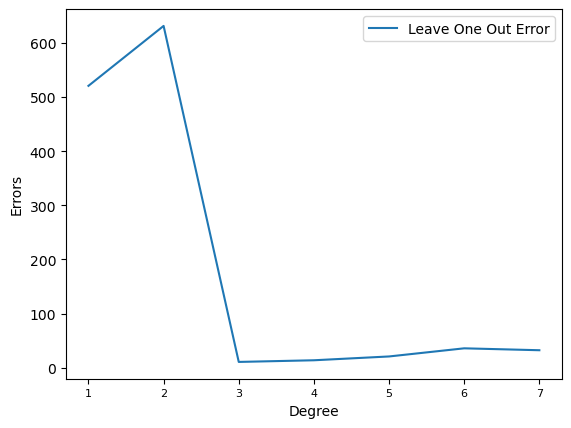

In [9]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LOOCV_df['Degree'].values,LOOCV_df['Validation Error'].values,label = 'Leave One Out Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

As shown at the LOOCV_df dataframe and the graph, validation error has lowest value (10.591862) at the 3rd degree of the polynomial according to the LOOCV mean squared error. 

**(c) Refit your model on the training set with the selected degree of polynomial 
and compute the test mean squared error.**

In [10]:
# PolynomialFeatures function is reused with degree 3, and it is fitted with X_train.

pol_feat = PolynomialFeatures(degree=3,include_bias=False)

# After fit_transform, new X_train is X_train_poly which is 3rd degree polynomial version of X_train

X_train_poly = pol_feat.fit_transform(X_train)

# X_train_poly and Y_train are fitted into the polynomial model

pol_model = LinearRegression()
pol_model.fit(X_train_poly, Y_train)

# X_test values are also fitted into the polynomial features, and predictions are made

X_test_poly = pol_feat.fit_transform(X_test)
Y_test_predict=pol_model.predict(X_test_poly)

# Finally, mean squared error is printed for Y_test and Y_test_predict values

mse_test = mean_squared_error(Y_test, Y_test_predict)
print(f"MSE: {mse_test}")

MSE: 7.106966845948189


When degree of the polynomial is arranged to 3, mean squared error for the test set is 7.106966845948189.

**(d) Try different degrees of polynomial functions and pick the one that has the 
smallest 5-fold cross validation mean squared error, and report 5-fold cross 
validation errors of each polynomial functions.**

In [11]:
from sklearn.model_selection import KFold

In [12]:
# By using KFold(), training data is splitted into 5 equally-sized folds.

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
CV_Errors=[]

for j in range(1,8):
    # With for loop, polynomial degrees (1 to 8) are tried into the data
    
    for train_index, validation_index in kfold.split(X_train):
        X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
        
        # Respect to their indexes, training set is splitted as train_v and valid by using kfold cross-validation.
        # Then, these are entered to the pol_reg_model function with their polynomial degrees.
        # At least, dataframe is created by using output of the pol_reg_model function.
        
        CV_Errors.append(pol_reg_model(j, X_trainv, Y_trainv, X_valid, Y_valid))
    kfold_cv = pd.DataFrame (CV_Errors,columns=['Training Error','Validation Error','Degree'])
pd.set_option('display.max_rows', None)

In [13]:
# This dataframe shows training and validation error results of each fold.

kfold_cv

,Training Error,Validation Error,Degree
0,509.472265,269.171404,1
1,514.972668,274.671441,1
2,252.628030,1479.231444,1
3,469.494403,432.580942,1
4,512.267286,291.677450,1
5,425.318407,530.535739,2
6,475.299981,276.616208,2
7,244.059331,1819.069917,2
8,417.700756,495.200156,2
9,472.659113,288.070691,2


In [14]:
# For each polynomial degree, mean of the validation errors are calculated and showed at the below.

kfoldCV_degree = kfold_cv.groupby("Degree")
kfoldCV_degree = kfoldCV_degree.mean()
kfoldCV_degree = kfoldCV_degree.reset_index()
kfoldCV_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,549.466536
1,2,681.898542
2,3,10.831333
3,4,14.112977
4,5,19.012588
5,6,16.125396
6,7,20.790651


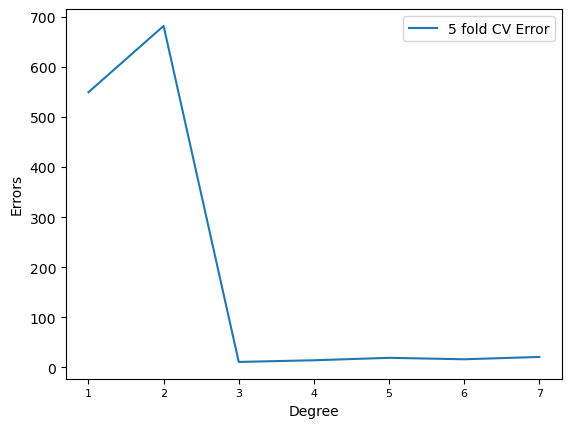

In [15]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_degree['Degree'].values,kfoldCV_degree['Validation Error'].values,label = '5 fold CV Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

Like LOOCV, 3rd degree polynom gives lowest validation error (10.831333) for the data in 5-fold cross validation.

**(e) Refit your model on the training set with the selected degree of polynomial 
and compute the test mean squared error and test R2 score**

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

# PolynomialFeatures function is reused with degree 3, and it is fitted with X_train.

pol_feat = PolynomialFeatures(degree=3,include_bias=False)

# After fit_transform, new X_train is X_train_poly which is 3rd degree polynomial version of X_train

X_train_poly = pol_feat.fit_transform(X_train)

# X_train_poly and Y_train are fitted into the polynomial model

pol_model = LinearRegression()
pol_model.fit(X_train_poly, Y_train)

# X_test values are also fitted into the polynomial features, and predictions are made

X_test_poly = pol_feat.fit_transform(X_test)
Y_test_predict=pol_model.predict(X_test_poly)

mse_test = mean_squared_error(Y_test, Y_test_predict)
r2 = r2_score(Y_test, Y_test_predict)
print(f"MSE: {mse_test}")
print(f"R2 Score: {r2}")

MSE: 7.106966845948189
R2 Score: 0.9603145469268796


The mean squared error (MSE) of a test set is a measure of how well a regression model generalizes to new, unseen data. In the test set of the dataset, it is measured as 7.106966845948189. This quantifies the average squared difference between the actual and predicted values in the test set.

The R2 score or the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. R2 takes values between 0 and 1, approaching 1 as the model's predictive accuracy improves. In this model, it is measured as 0.9603145469268796. This value is very close to 1, so the model is able to explain 96% of the variability in the dependent variable. In other words, the model provides a very good fit to the data, where the predicted values closely match the actual values.

**f) Are the degrees of polynomials chosen with LOOCV and 5-fold cross 
validation same?**

Although the lowest validation error values are slightly different in LOOCV (10.591862) and 5-fold cross-validation (10.831333), both indicate that a 3rd-degree polynomial is the best fit for the given dataset.